Across a pooled panel of 19 countries (2010–2025), which core macro indicator—GDP level, inflation rate, or unemployment rate—most consistently predicts annual economic growth?

In [11]:
# I needed to install kaggle and upload the api key.
!pip install -q kaggle
from google.colab import files
files.upload()  # kaggle than prompted me to upload my api key once the files.upload() was finished

# then I used makedirs to create the new file itself.
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# the data was in a .zip format and I need to unzip it
!kaggle datasets download -d adilshamim8/economic-indicators-and-inflation -p /content/data --unzip
# this was the dataset title

# Then once the data was unzipped, I loaded it into a .csv.
import glob, pandas as pd
csv_file = glob.glob('/content/data/*.csv')[0]
print("Loading file:", csv_file)
df = pd.read_csv(csv_file)

# As we did in class, the date was made the index
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Year'].astype(str), format='%Y')
df.set_index('Date', inplace=True)

# did it load in correctly?
df.head()


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/adilshamim8/economic-indicators-and-inflation
License(s): apache-2.0
Loading file: /content/data/Economic Indicators And Inflation (1) (1).csv


,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
Date,,,,,,
2010-01-01,USA,2010,15000.0,1.64,9.63,2.55
2011-01-01,USA,2011,15500.0,3.16,8.94,1.53
2012-01-01,USA,2012,16000.0,2.07,8.10,2.28
2013-01-01,USA,2013,16500.0,1.50,7.70,1.84
2014-01-01,USA,2014,17000.0,1.62,7.25,2.53


In [ ]:
# yes it did.

Descriptive Statistics and EDA

In [12]:
import pandas as pd
import matplotlib.pyplot as plt # this is essential for our plots

In [13]:
# Descriptive Stats using .describe
print("Descriptive statistics for core variables:\n")
print(df[['GDP (in billion USD)',
          'Inflation Rate (%)',
          'Unemployment Rate (%)',
          'Economic Growth (%)']].describe().T) # .describe takes all the columns
          # and computes mean,std, min, and varying percentages.


Descriptive statistics for core variables:

                       count         mean          std    min      25%  \
GDP (in billion USD)   304.0  3383.430921  4283.442479  105.0  1114.25   
Inflation Rate (%)     304.0     4.807105     7.261215   -1.2     1.70   
Unemployment Rate (%)  304.0     6.257467     2.609952    2.1     4.50   
Economic Growth (%)    304.0     3.060428     3.308527  -14.0     1.60   

                          50%       75%      max  
GDP (in billion USD)   2006.5  3625.000  22500.0  
Inflation Rate (%)        3.3     5.500     85.5  
Unemployment Rate (%)     5.5     7.850     13.7  
Economic Growth (%)       2.9     5.125     11.0  


In [14]:
# Comments:
# Mean growth is about 3.06% and the standard deviation is 3.31%
# GDP has very wide ranges, so we must accurately scale the data
# Inflation has many outliers
# Unemployment spans from 2.7% to 13.7%

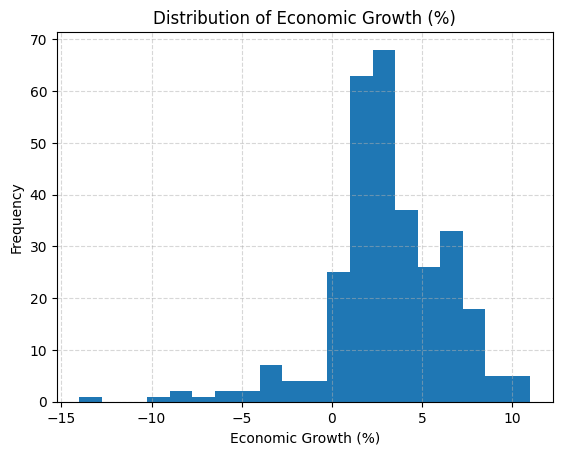

In [15]:
# EDA
# Histogram of Economic Growth, this was done to examine the distribution of the data
# are their outliers?
plt.figure()
plt.hist(df['Economic Growth (%)'], bins=20)
plt.title('Distribution of Economic Growth (%)')
plt.xlabel('Economic Growth (%)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [16]:
# comments:
# Most countries see positive growth that is clustered between 0-6%
# Some observations involve -15%, which could be due to the 2020 recession

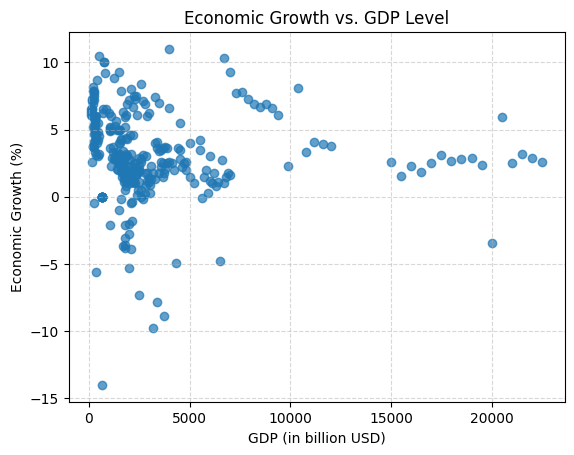

In [17]:
# GDP vs Economic Growth scatter plot that examine correlation.
plt.figure()
plt.scatter(df['GDP (in billion USD)'], df['Economic Growth (%)'], alpha=0.7)
plt.title('Economic Growth vs. GDP Level')
plt.xlabel('GDP (in billion USD)')
plt.ylabel('Economic Growth (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [18]:
# comments:
# No clear linear relationship, large economies exhibit both high and low growth

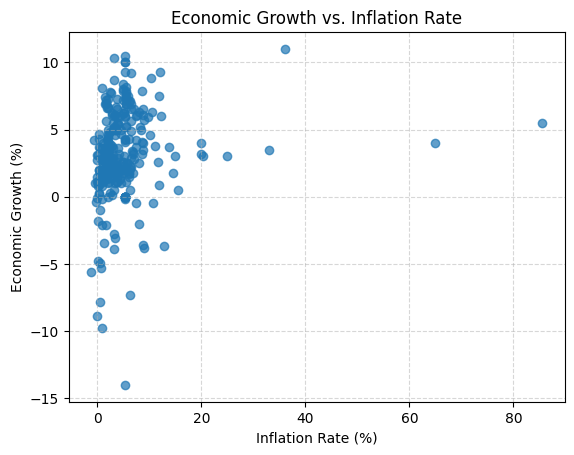

In [19]:
# Scatter: Inflation Rate vs. Economic Growth, stronger relationship, less inflation more economic growth
plt.figure()
plt.scatter(df['Inflation Rate (%)'], df['Economic Growth (%)'], alpha=0.7)
plt.title('Economic Growth vs. Inflation Rate')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Economic Growth (%)')
plt.grid(True, linestyle='--', alpha=0.5) # grid aesthetics.
plt.show()

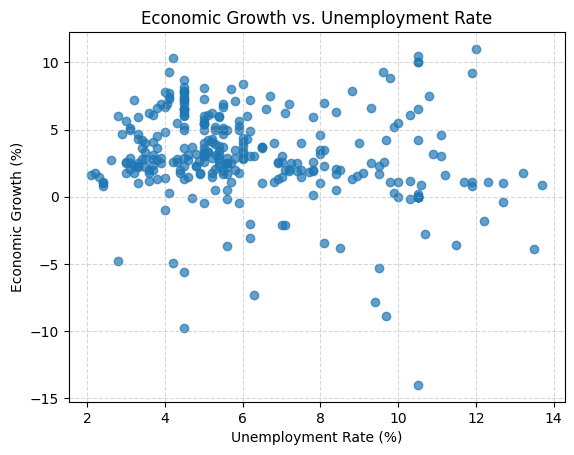

In [21]:
 #Scatter:  Unemployment Rate vs. Economic Growth
plt.figure()
plt.scatter(df['Unemployment Rate (%)'], df['Economic Growth (%)'], alpha=0.7)
plt.title('Economic Growth vs. Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Economic Growth (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [22]:
# Unclear relationship, data is scattered heavily, weak negtaive relationship.

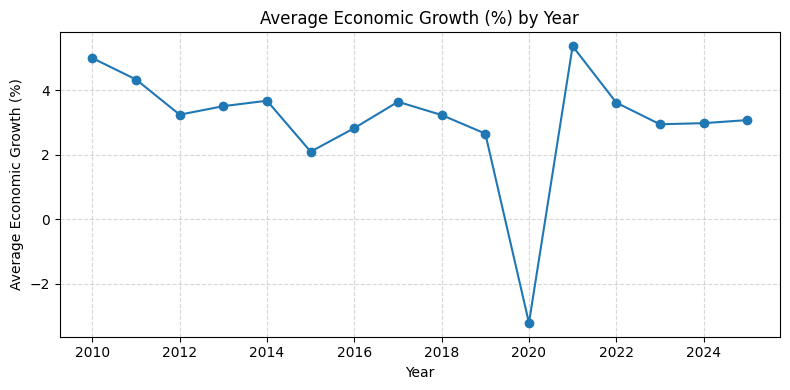

In [23]:
#Time series: Average Economic Growth, big drop in 2020.
mean_growth = df.groupby('Year')['Economic Growth (%)'].mean()
plt.figure(figsize=(8, 4))
plt.plot(mean_growth.index, mean_growth.values, marker='o')
plt.title('Average Economic Growth (%) by Year')
plt.xlabel('Year')
plt.ylabel('Average Economic Growth (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [24]:
# comments:
# steady growth around 3-4% until covid 19 pandemic drop

In [25]:
# correlations between all the scatter plots, they support the earlier conclusions.
import pandas as pd
corr_gdp = df['Economic Growth (%)'].corr(df['GDP (in billion USD)'])
corr_infl = df['Economic Growth (%)'].corr(df['Inflation Rate (%)'])
corr_unemp = df['Economic Growth (%)'].corr(df['Unemployment Rate (%)'])

print(f"Correlation between Economic Growth and GDP level: {corr_gdp:.3f}")
print(f"Correlation between Economic Growth and Inflation Rate: {corr_infl:.3f}")
print(f"Correlation between Economic Growth and Unemployment Rate: {corr_unemp:.3f}")

Correlation between Economic Growth and GDP level: -0.055
Correlation between Economic Growth and Inflation Rate: 0.158
Correlation between Economic Growth and Unemployment Rate: -0.205


Before we get into our regression models, we need to address the strong outliers in this dataset that will most definetely affect our models.

In [26]:
# Winsorize: from scipy stats library, it cap values beyond some quantile (1%-99% percentiles) so the regressors and targets do not go to extreme levels
import pandas as pd
from scipy.stats.mstats import winsorize

# key percentiles
growth = df['Economic Growth (%)']
pct = growth.quantile([0.01, 0.025, 0.05, 0.95, 0.975, 0.99])
print("Selected percentiles of Economic Growth (%):")
print(pct)

# then we can label a high p and a low p and cap it.
p_low, p_high = pct.loc[0.01], pct.loc[0.99]
print(f"\nCapping values below {p_low:.2f}% to {p_low:.2f}% and above {p_high:.2f}% to {p_high:.2f}%")

# apply the winsorize feature
df['growth_winsorized'] = winsorize(
    df['Economic Growth (%)'],
    limits=(0.01, 0.01)  # 1% on both upper and lower tails.
)

# did it work?
# print the before and after.
print("\nBefore winsorization:")
print(growth.describe())
print("\nAfter winsorization:")
print(df['growth_winsorized'].describe())
# winsorization is meant to address our target of economic growth so that pandemic years do not dominate data

Selected percentiles of Economic Growth (%):
0.010    -7.7850
0.025    -4.8425
0.050    -2.6950
0.950     7.9000
0.975     8.9700
0.990    10.0000
Name: Economic Growth (%), dtype: float64

Capping values below -7.79% to -7.79% and above 10.00% to 10.00%

Before winsorization:
count    304.000000
mean       3.060428
std        3.308527
min      -14.000000
25%        1.600000
50%        2.900000
75%        5.125000
max       11.000000
Name: Economic Growth (%), dtype: float64

After winsorization:
count    304.000000
mean       3.085099
std        3.169879
min       -7.800000
25%        1.600000
50%        2.900000
75%        5.125000
max       10.000000
Name: growth_winsorized, dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [27]:
# Lets create a recession dummy so that the model can explain any trough's in the data
recessions = [2008, 2009, 2020]
df['Recession'] = df['Year'].isin(recessions).astype(int)
# recession column has been added

In [28]:
# Robust scaling: centering each numeric feature on its median and divide by inter quartile range
# Robust scaling is applied to the predictors so that high-inflation and high-unemployment features do not skew the distributions.
# The IQR ignores the tails of the predictors so that recession years do not blow out the scaling factors.
# this will help our MLPRegressor converge faster when dominated by handful of extreme values.
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
numeric = ['GDP (in billion USD)', 'Inflation Rate (%)', 'Unemployment Rate (%)'] # these the predictors we want to robust scale

# lets fit the scaler on the data
df[numeric] = scaler.fit_transform(df[numeric])
# the formula below describes the robust scaler procees.

### markdown $$ x_{\mathrm{scaled}} \;=\; \frac{x - \mathrm{median}(x)}{\mathrm{IQR}(x)} \quad\text{where}\quad \mathrm{IQR}(x) = Q_{75}(x)\;-\;Q_{25}(x) $$

# Now lets show some visualizations after the data has been restructured

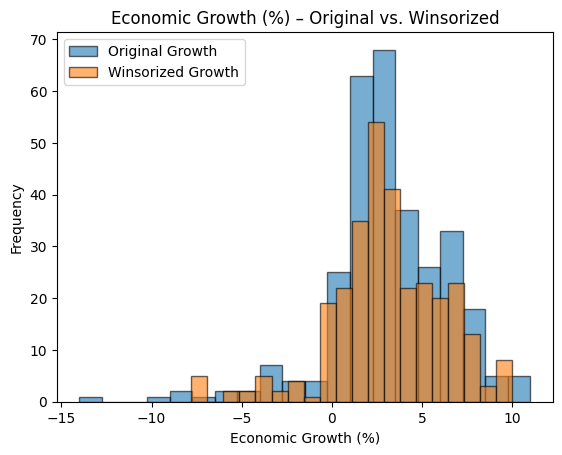

In [29]:
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler

# apply a variable to the predictors
numeric_cols = ['GDP (in billion USD)', 'Inflation Rate (%)', 'Unemployment Rate (%)']

# store the original pre-transford data for comparison
orig_growth = df['Economic Growth (%)'].copy()
orig_numeric = df[numeric_cols].copy()

# winsorize the target, new data
df['growth_winsorized'] = winsorize(orig_growth, limits=(0.01, 0.01))

# apply robust scaling to the predictors
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(orig_numeric)

# now plot a histogram that shows the new winsorized distribution.
plt.figure()
plt.hist(orig_growth, bins=20, alpha=0.6, label='Original Growth', edgecolor='k')
plt.hist(df['growth_winsorized'], bins=20, alpha=0.6, label='Winsorized Growth', edgecolor='k')
plt.title('Economic Growth (%) – Original vs. Winsorized')
plt.xlabel('Economic Growth (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [30]:
# Data is more centered, less extreme values. Now our target is ready for the four regression models.

In [31]:
# make sure that the winsorized column is applied to the df.
df['growth_winsorized'] = winsorize(orig_growth, limits=(0.01, 0.01))

# ovverides the original numeric_cols with the newly transformed ones.
df[numeric_cols] = scaler.fit_transform(orig_numeric)
df.head()
df.info()
# changes are now saved.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 304 entries, 2010-01-01 to 2025-01-01
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                304 non-null    object 
 1   Year                   304 non-null    int64  
 2   GDP (in billion USD)   304 non-null    float64
 3   Inflation Rate (%)     304 non-null    float64
 4   Unemployment Rate (%)  304 non-null    float64
 5   Economic Growth (%)    304 non-null    float64
 6   growth_winsorized      304 non-null    float64
 7   Recession              304 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 21.4+ KB


In [32]:
df.head()

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%),growth_winsorized,Recession
Date,,,,,,,,
2010-01-01,USA,2010,5.175147,-0.436842,1.232836,2.55,2.55,0
2011-01-01,USA,2011,5.374291,-0.036842,1.026866,1.53,1.53,0
2012-01-01,USA,2012,5.573434,-0.323684,0.776119,2.28,2.28,0
2013-01-01,USA,2013,5.772578,-0.473684,0.656716,1.84,1.84,0
2014-01-01,USA,2014,5.971722,-0.442105,0.522388,2.53,2.53,0


In [ ]:
# it worked.

# Modeling and Interpretations

In [51]:
from sklearn.dummy import DummyRegressor # for the baseline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# define the predictors(X) and the target(y)
numeric_cols = ['GDP (in billion USD)', 'Inflation Rate (%)', 'Unemployment Rate (%)']
X = df[['Country'] + numeric_cols]
y = df['growth_winsorized']

# Train/test split  with a random state of 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# fit the baseline
baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)

# evaluate the scores of typical statistical metrics.
r2   = r2_score(y_test, y_pred_base)
mae  = mean_absolute_error(y_test, y_pred_base)
mse  = mean_squared_error(y_test, y_pred_base)
rmse = np.sqrt(mse)

print("Baseline Performance (mean predictor):")
print(f"  R²   = {r2:.5f}")
print(f"  MAE  = {mae:.3f}")
print(f"  RMSE = {rmse:.3f}")
print(f"Baseline MSE = {mse:.3f}")
# print using f string.


Baseline Performance (mean predictor):
  R²   = -0.00237
  MAE  = 2.912
  RMSE = 3.939
Baseline MSE = 15.513


Overall, from the baseline values for each metric( -.00237, 2.912, 3.939, 15.513) respectively, we can make some conclusions about the baseline. For R², which employs a ‘predict the mean’ is actually performing worse than the average growth for every observation. It captures no variation in the data which is what this metric is meant to do.
	For the MAE, the baseline’s prediction is off by 2.91 percentage points of growth every year. The RMSE is meant to show the large misses in the data, meaning the outliers where growth deviates strongly from the mean. The RMSE of 3.939 shows that outliers are having a stronger effect on the data than I would like. Finally the MSE of 15.513 shows that some country-year pairs sit far from the mean, due again too large deviations.
	The following models will harness the signals in GDP, inflation rates, and unemployment
rates in order to meaningfully shrink the errors.


In [34]:
# what do these baseline values mean?
# R^2 (coefficient of determination) is caluclated by:

$$
R^2 \;=\; 1 \;-\; \frac{\mathrm{SSE}}{\mathrm{SST}}
$$

In [35]:
# what it shows: A measure of how much of the variation in the true values the baseline
# SSE = Sum of Squared Errors = sum of (prediction – actual)² over all points
# SST = Total Sum of Squares = sum of (actual – mean)² over all points
# Bounds: An R² of 1 means perfect predictions (you explain 100% of the ups and downs).
# An R² of 0 means you do no better than always guessing the average

#R² = –0.002 tells us our “predict the average growth” strategy actually makes slightly bigger squared errors than the trivial average forecast.
#In other words, it has essentially zero explanatory power and the baseline model power is very poor.

In [36]:
# Mean Absolute Error The average of the absolute differences between the predictions and the actual values
# On average, how many percentage points is the model off by?
# an MAE of 2.912, by always predicting the mean growth, the baseline model is off by about 2.9 percentage points on average.

In [37]:
#RMSE: Root mean sqaured error, mse square rooted.
# RMSE = 3.939 tells us that when our baseline is wrong, it’s typically off by about 3.9 percentage points,
# and that the occasional really large misses (for example during deep recessions) are driving this number upward

In [38]:
# Regular MSE
# A value of 15.13,
# A baseline that always predicts the mean growth (≈3%) will be off by something like 10–11 points in a very poor year (e.g. predicting 3% when actual is –8%), so that one point alone contributes
# Even if most years are closer to the mean, those handful of “big misses” still drive the average squared error up into the teens:

# Linear Regression

In [42]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [43]:
# How will this procees differ from the baseline?
# The baseline made no use of any inputs. It will only learn one number and predict that regardless of economic conditions
# in contrast, the linear regression, takes features as inputs and produces conditional forecasts

# define the same features from the baseline
numeric_cols = ['GDP (in billion USD)', 'Inflation Rate (%)', 'Unemployment Rate (%)']
X = df[['Country'] + numeric_cols]
y = df['growth_winsorized'] # target

# Train/test split using same random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# one hot encode the country and pass through the rest.
preprocessor = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first'), ['Country'])],
    remainder='passthrough'
)

# Build and fit pipeline
lin_pipe = Pipeline([
    ('pre', preprocessor),
    ('lr',  LinearRegression())
])
lin_pipe.fit(X_train, y_train)

# Predict and evaluate using f string.
y_pred = lin_pipe.predict(X_test)
print("Linear Regression Performance:")
print(f"  R²   = {r2_score(y_test, y_pred):.3f}")
print(f"  MAE  = {mean_absolute_error(y_test, y_pred):.3f}")
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"  RMSE = {rmse:.3f}")
print(f"Linear Regression MSE = {mse:.3f}")

Linear Regression Performance:
  R²   = 0.389
  MAE  = 1.708
  RMSE = 3.074
Linear Regression MSE = 9.451


In [44]:
# The Linear Regression Model definetely performed much better than the baseline
# But is this difference actually statisticall significant?
# we can use a t-test to figure it out
from scipy.stats import ttest_rel


# re fit the baseline
baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train, y_train)
y_base = baseline.predict(X_test)

# compute sqaured errors for both the baseline and linear model, using t formula.
sqerr_base = (y_test - y_base) ** 2
sqerr_lin  = (y_test - y_pred)     ** 2

# confirm null hypothesis and hypotheiss test.
#    H₀: mean(sqerr_base) – mean(sqerr_lin) = 0
#    H₁: mean(sqerr_base) – mean(sqerr_lin) > 0 we are trying to prove that the linear model is better so its an increase from the null.
stat, p_value = ttest_rel(sqerr_base, sqerr_lin, alternative='greater')

print("Paired t‑test on Squared Errors:")
print(f"  t‑statistic = {stat:.3f}")
print(f"  p‑value     = {p_value:.7f}") # 7 decimal places so that p-value is shown.

# interpretation using if else statements
alpha = 0.05
if p_value < alpha:
    print(" The linear model’s reduction in MSE is statistically significant at α = 0.05.")
else:
    print(" No significant reduction in MSE at α = 0.05.")


Paired t‑test on Squared Errors:
  t‑statistic = 4.233
  p‑value     = 0.0000401
 The linear model’s reduction in MSE is statistically significant at α = 0.05.


# The difference in the Linear Regression's model and the baseline model is statistically significant

How do these values relate to the baseline? The linear model now explains about 39% of the year to year variation in winsorized growth rates. The baseline value explained zero. Out of all the ups and downs in growth across 19 countries, nearly ⅖ can be accounted for by changes in the inputs. The MAE is cut in half by the linear model. This regression model uses the inputs as a predictive power and it reduces the MAE to 1.71. The RMSE also shows improvement, as the worst case predictors(extreme values) are now closer to actual growth, yet, occasional sharp downturns still pull the average error magnitude up to 3.074. The mean squared error itself dropped by 39%. The linear regression definitely beats the baseline and it limits extreme misses.

With an alpha of .05 as our cut off, a p-value less than that will conclude a statistical significance. A one sided hypothesis test based on squared errors of both the base and the linear models gives us a p-value of .0000401. This tells us that there is a meaningful statistical difference between the linear model and the baseline model.


# Next Regression Model: Decision Tree Regressor Pipeline

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


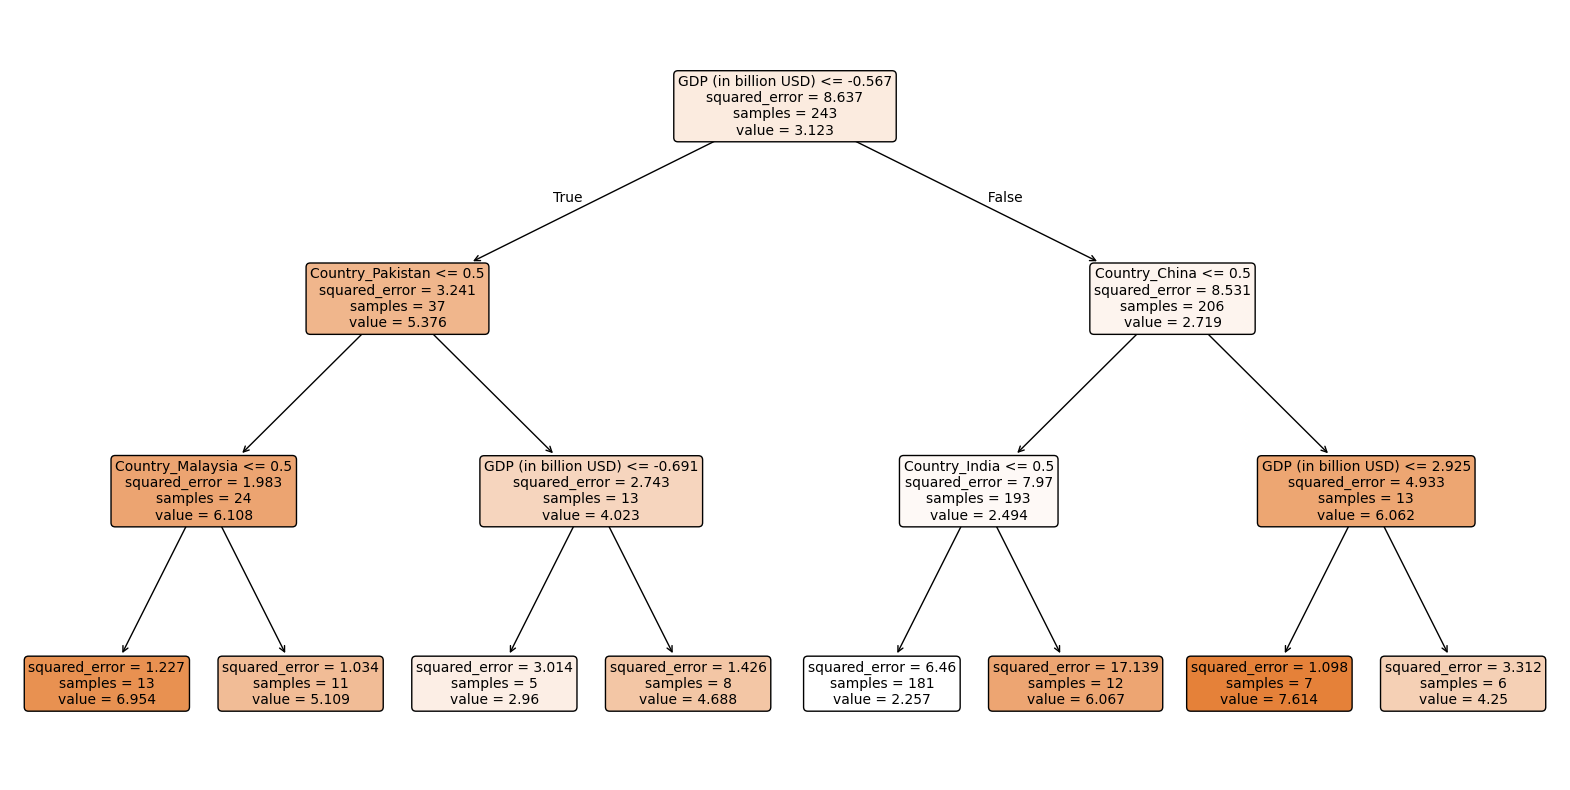

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# list predictors but this time we need to define them based on categorical vs numerical
categorical_cols = ['Country']
numeric_cols     = ['GDP (in billion USD)',
                    'Inflation Rate (%)',
                    'Unemployment Rate (%)']

# we need to apply a column transformer to both types.
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe_country', OneHotEncoder(drop='first'), categorical_cols),
        ('pass_num', 'passthrough',    numeric_cols)
    ]
)

# shallow tree pipeline so that we cap the amount of splits and show only the best ones.
shallow_tree = Pipeline([
    ('pre', preprocessor),
    ('dt',  DecisionTreeRegressor(max_depth=3, random_state=42))
])

# fit it
shallow_tree.fit(X_train, y_train)

# extract the trained tree and feature names
tree_model   = shallow_tree.named_steps['dt']
ohe_feature_names = shallow_tree \
    .named_steps['pre'] \
    .named_transformers_['ohe_country'] \
    .get_feature_names_out(categorical_cols)

feature_names = list(ohe_feature_names) + numeric_cols

# plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()
# plot the tree.

Analysis of decision tree
1) The fitted tree uses GDP size as its first and most important split, separating “smaller” economies (scaled GDP ≤ –0.567) from “larger” ones. Within the smaller‐economy group, it further distinguishes Pakistan and Malaysia (and even splits very tiny GDPs), predicting growth rates from ≈ 2.96% up to ≈ 6.95%. In the larger‐economy group, it then splits off China and India as higher‐growth outliers (predicting ≈ 6–7.6%) versus the rest (≈ 2.3–2.5%). Each leaf’s “value” (the predicted growth) and its leaf MSE show that the model creates homogeneous subgroups—for example, the Malaysia leaf has an MSE of only 1.03, indicating very tight predictions around 5.11%.

GDP size is the strongest driver: mid‑small economies grow fastest (~5–7%), largest ones slowest (~2–3%), with ultra‑small outliers on either side.

How does the decision tree compare to the linear mode? The decision tree first splits the countries by GDP size, then creates more subgroups based on low performing nations compared to high performing nations. Each final leaf in the last row predicts a single growth rate. Ranging from 2.96% for smaller nations to 7.61% for mid-size Chinese GDP observations.
	How do the metrics compare to the linear regression? R² increases to .412, meaning the decision tree explains about 41% of the variation in annual growth. It also cuts down MAE and RMSE, reducing big errors.
	The decision tree also identifies GDP size as the strongest predictor of annual economic growth. It also takes into account the country effects next. After distinguishing based on GDP, the tree uses one-hot country indicators(Pakistan, Malaysia, India, and China) to capture country specific trends. Specifically, mid-small economies, like Malaysia and Pakistan, grow faster than other small economies. Unfortunately, inflation and unemployment are much weaker predictors of economic growth using this model.


Decision Tree Compared to Linear Regression it acheived:

R²=0.412: It explains about 41.2% of the year‑to‑year variation in economic growth—an improvement over the 0% baseline and slightly above the linear model’s 38.9%.

MAE = 1.69 pp: On average, its growth forecasts miss the true value by 1.69 percentage points, shaving nearly 0.3 pp off the linear model’s MAE of 1.71.

MSE = 8.80: The average squared mistake is 8.80 (pp)², down from the baseline’s 15.5 and the linear model’s 9.45.

RMSE = 2.97 pp: The typical size of its error is 2.97 percentage points, compared to 3.94 for the baseline and 3.07 for the linear fit.

Bottom line: the tree not only uncovers interpretable, GDP‑ and country‑based growth regimes but also delivers statistically and practically better forecasts than both the naïve baseline and the linear model.

# Random Forest Model:

In [58]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# define the categorical and numerical again.
categorical_cols = ['Country']
numeric_cols     = ['GDP (in billion USD)',
                    'Inflation Rate (%)',
                    'Unemployment Rate (%)']

# compute the preprocessor using column transformer, then pass it through.
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe',      OneHotEncoder(drop='first'), categorical_cols),
        ('pass_num', 'passthrough',               numeric_cols)
    ]
)

# build and fit the pipeline.
rf_pipe = Pipeline([
    ('pre', preprocessor),
    ('rf',  RandomForestRegressor(
                 n_estimators=100,
                 random_state=42,
                 n_jobs=-1
             ))
])

rf_pipe.fit(X_train, y_train)

# evaluate using f string
y_pred_rf = rf_pipe.predict(X_test)
r2_rf   = r2_score(y_test, y_pred_rf)
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
mse_rf  = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Performance:")
print(f"  R²   = {r2_rf:.3f}")
print(f"  MAE  = {mae_rf:.3f}")
print(f"  MSE  = {mse_rf:.3f}")
print(f"  RMSE = {rmse_rf:.3f}")


Random Forest Performance:
  R²   = 0.421
  MAE  = 1.674
  MSE  = 8.962
  RMSE = 2.994


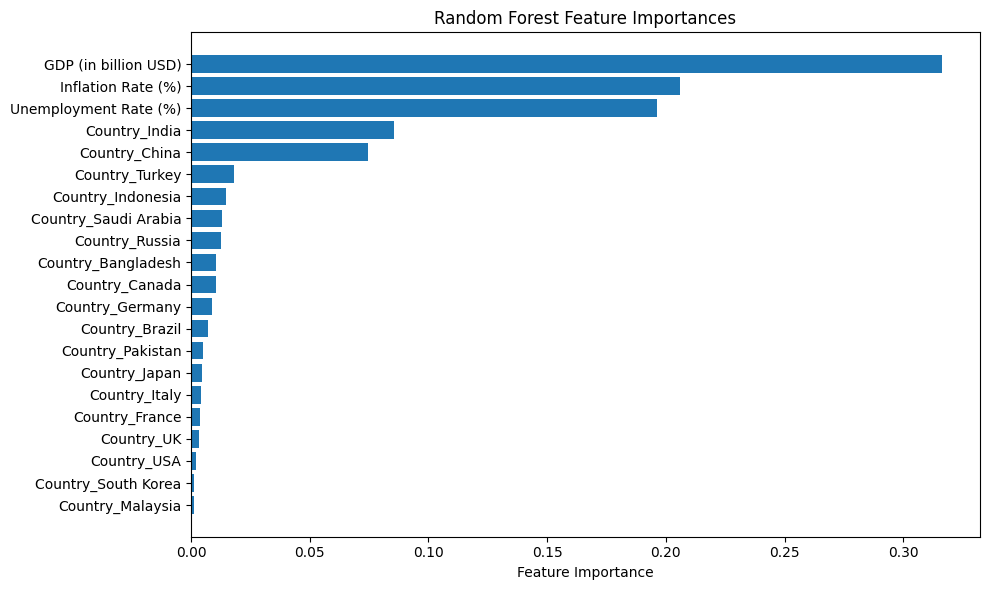

In [60]:
# feature importance ranking based off random forest
import matplotlib.pyplot as plt
import numpy as np

# extract the trained random forest and the preprocessor
rf_model = rf_pipe.named_steps['rf']
preprocessor = rf_pipe.named_steps['pre']

# get the one hote encoded features.
ohe_features = preprocessor.named_transformers_['ohe'].get_feature_names_out(['Country'])
feature_names = list(ohe_features) + numeric_cols

# sort them using importance
importances = rf_model.feature_importances_
idx_sorted = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in idx_sorted]
sorted_importances = importances[idx_sorted]

# plot it
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.gca().invert_yaxis()  # highest importance on top (GDP)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


The trend is similar to the decision tree, GDP is definitely the most important feature. Yet, the random forest regressor also leverages year-to-year changes in inflation and unemployment, unlike the decision tree which ignored the other two predictors.


# Neural Network

In [63]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Feature sets same as the last two models
categorical_cols = ['Country']
numeric_cols     = ['GDP (in billion USD)',
                    'Inflation Rate (%)',
                    'Unemployment Rate (%)']

# Preprocessor: one‑hot Country + scale numeric, similar to the last two.
preprocessor = ColumnTransformer([
    ('ohe_country', OneHotEncoder(drop='first'), categorical_cols),
    ('scale_num',   StandardScaler(),           numeric_cols)
])

# create the neural network pipeline.
nn_pipe = Pipeline([
    ('pre', preprocessor),
    ('nn',  MLPRegressor(
                hidden_layer_sizes=(50, 25),
                activation='relu',
                solver='adam',
                max_iter=1000,
                random_state=42
            ))
])

# Fit it on the training and test
nn_pipe.fit(X_train, y_train)
y_pred = nn_pipe.predict(X_test)

# Compute and print test metrics using f string.
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Neural Network Performance on Test Set:")
print(f"  R²   = {r2:.3f}")
print(f"  MAE  = {mae:.3f}")
print(f"  MSE  = {mse:.3f}")
print(f"  RMSE = {rmse:.3f}")


Neural Network Performance on Test Set:
  R²   = 0.303
  MAE  = 1.959
  MSE  = 10.779
  RMSE = 3.283


The metrics output display interesting results. The R² for the neural network only beats the baseline and falls behind on the other three models. It only explains 30.3% of the variation in annual-growth. The MAE also falls behind the first three models. Even the RMSE performed worst, meaning large misses in the dataset (outliers) seem to be distorting the results to a greater extent.


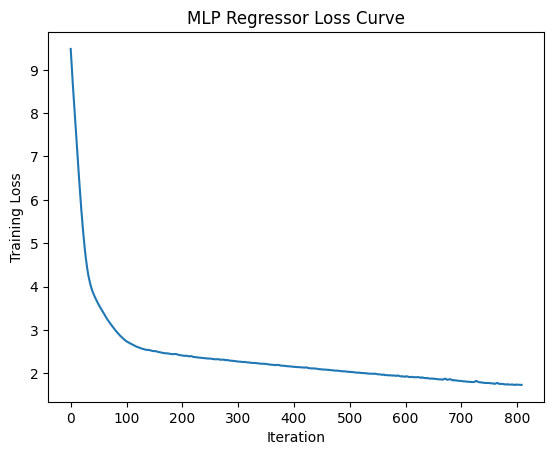

In [64]:
# loss curve: was the neueral network trained the right way?
import matplotlib.pyplot as plt

# After fitting nn_pipe
loss = nn_pipe.named_steps['nn'].loss_curve_

plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('MLP Regressor Loss Curve')
plt.show()


We can determine this from a MLP regressor loss curve that shows a smooth decline in training error over 800 iterations. The sharp initial decline is a good sign. The training loss drops from 9 to around 2.5. The network efficiently captures the strongest signals in the data. These signals include the most straightforward relationships, including higher GDP equaling higher growth. Other trends it quickly captures are the disparity between the growth of certain countries. The smooth curve shows that the data is not overfit, as a sudden increase in the line would indicate this. This gradual decrease is typical in the MLP regressor loss curve, as further improvements in the error come with diminishing returns.
	In terms of the ranking of core indicators, the network ranks GDP as the highest due to the biggest drop in loss happening immediately.
	Secondly, once GDP’s effect is captured, further improvements are more gradual beginning at four. This is due to the smaller, predictive bumps as a result of accounting for inflation and unemployment. Their impact is definitely present in the dataset, otherwise the loss would flatten immediately. However, they are secondary to GDP. Once you account for these three core indicators, remaining non-linear interactions barely move the test metrics. This confirms that the three predictors have the most effect.


# Conclusion:

Now that we have analyzed four different regression models, which is the best? Random Forest Regressor emerges as the clear winner. Its statistical metrics, R², MAE, and RMSE provide the most efficiency with .42, 1.67, and 2.99 respectively.
In line with the other models, it also predicts GDP levels as the strongest, and easiest to find, predictor of year-to-year growth. In addition, it provides a clear feature ranking with inflation rate second and unemployment third. While GDP is by far the strongest, Random Forest does not forget to include the remaining two predictors for increased complexity.
While this analysis was extensive, it is important to address any next steps. Specifically for the predictors themselves, I could compute inflation volatility as a percentage. Then it could also be paired with GDP growth rate percentages. In addition, while we did omit extreme values such as the 2020 pandemic, we could conduct an analysis that aims to address whether model performances change based on pre- and post- major economic events.
